In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving default of credit card clients.csv to default of credit card clients.csv
User uploaded file "default of credit card clients.csv" with length 2867208 bytes


In [0]:
import pandas as pd
pd.options.display.max_rows = 25000

import numpy as np
np.set_printoptions(threshold=np.inf)

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df = pd.read_csv("default of credit card clients.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Detailed EDA and Data Visualization



In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## For Payment Status Columns

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 

In [6]:
df_pay_status = df.loc[:, 'PAY_0':'PAY_6']
df_pay_status.columns = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
df_pay_status.head(3)

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


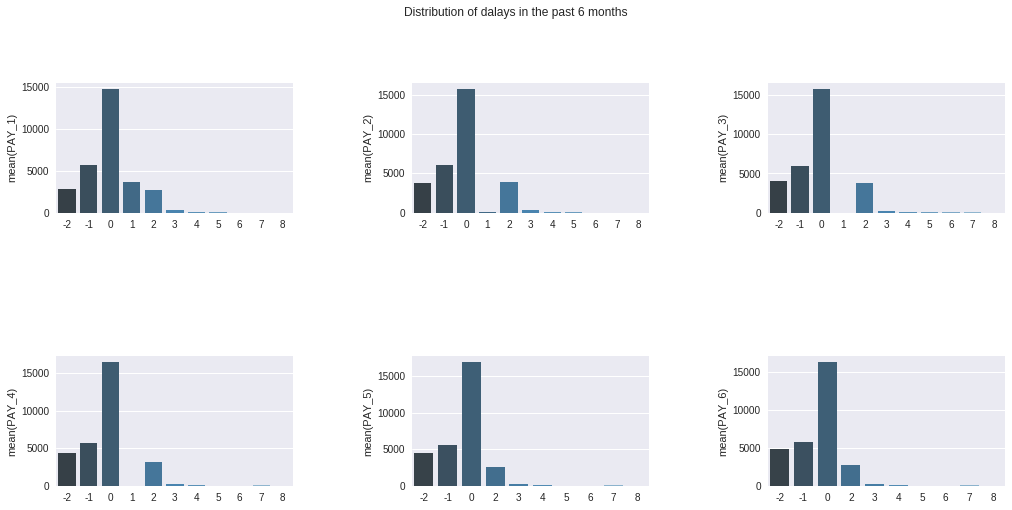

In [7]:
plt.tight_layout()
fig, axis = plt.subplots(2,3)
fig.set_size_inches(17,7)
ttl = fig.suptitle('Distribution of dalays in the past 6 months')
ttl.set_position([.5, 1.05])


left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace = 1.1 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

columns = df_pay_status.columns

for i in range(len(columns)):
    row, col = int(i/3), i%3
    d = df_pay_status[columns[i]].value_counts()
    e = d.index
    g = sns.barplot(x = e, y = d, ax = axis[row, col], palette = 'Blues_d' )

## For Bill Amount Columns
Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 

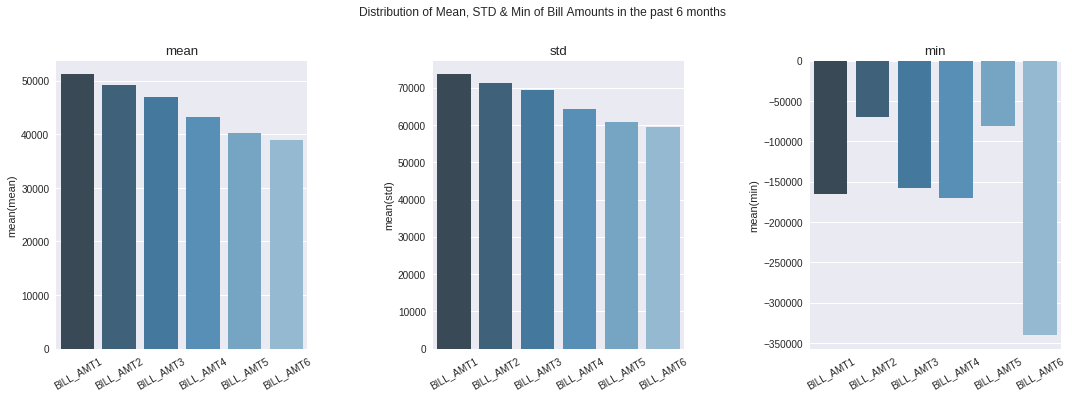

In [8]:
df_bill_amt = df.loc[:, 'BILL_AMT1':'BILL_AMT6']

bill_description = df_bill_amt.describe()



plt.tight_layout()
fig, axis = plt.subplots(1,3)
fig.set_size_inches(18,5)
ttl = fig.suptitle('Distribution of Mean, STD & Min of Bill Amounts in the past 6 months')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace =   2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

columns = bill_description.columns
sns.set(font_scale = 1.1)
sns.set_style("whitegrid")

for i in range(len(columns)/2):
    col = i%3
    j = i+1
    X = bill_description.columns[0:6]
    c = bill_description.index[j]
    Y = bill_description.loc[c]
    
    g = sns.barplot(x = X, y = Y, ax = axis[col], label='small', palette = 'Blues_d')
    g.set_xticklabels(bill_description.columns[0:6], rotation=30)

    g.set_title(c)

## For Payment Amount Columns
Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

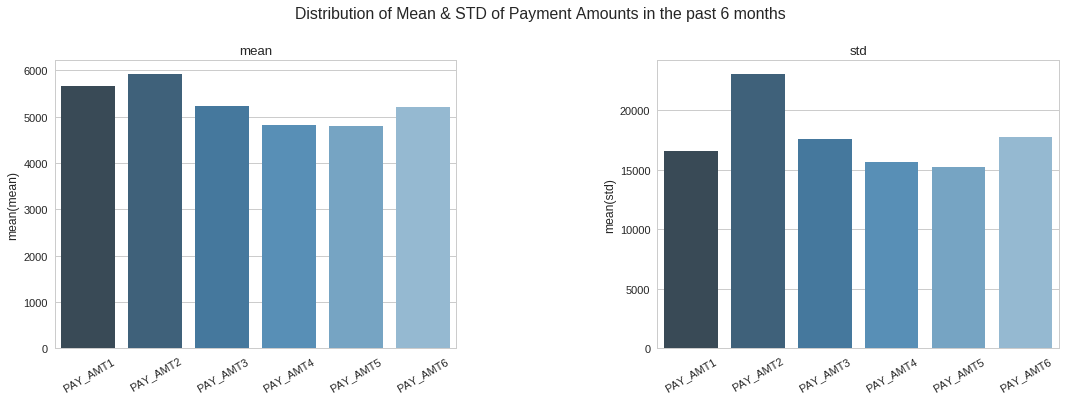

In [9]:
df_pay_amt = df.loc[:, 'PAY_AMT1':'PAY_AMT6']

pay_description = df_pay_amt.describe()

plt.tight_layout()
fig, axis = plt.subplots(1,2)
fig.set_size_inches(18,5)
ttl = fig.suptitle('Distribution of Mean & STD of Payment Amounts in the past 6 months')
ttl.set_position([.5, 1.05])

left   =  0.125  # the left side of the subplots of the figure
right  =  0.9    # the right side of the subplots of the figure
bottom =  0.1    # the bottom of the subplots of the figure
top    =  0.9    # the top of the subplots of the figure
wspace =  .5     # the amount of width reserved for blank space between subplots
hspace = 2 # the amount of height reserved for white space between subplots

plt.subplots_adjust(
    left    =  left, 
    bottom  =  bottom, 
    right   =  right, 
    top     =  top, 
    wspace  =  wspace, 
    hspace  =  hspace
)

columns = pay_description.columns
sns.set(font_scale = 1.1)


for i in range(2):
    col = i%3
    j = i+1
    
    X = pay_description.columns[0:6]
    c = pay_description.index[j]
    Y = pay_description.loc[c]
    
    g = sns.barplot(x = X, y = Y, ax = axis[col], label='small', palette = 'Blues_d')
    g.set_xticklabels(pay_description.columns[0:6], rotation=30)

    g.set_title(c)

## for Limit_Balance

[Text(0,0,u'50000'),
 Text(0,0,u'20000'),
 Text(0,0,u'30000'),
 Text(0,0,u'80000'),
 Text(0,0,u'200000'),
 Text(0,0,u'150000'),
 Text(0,0,u'100000'),
 Text(0,0,u'180000'),
 Text(0,0,u'360000'),
 Text(0,0,u'60000'),
 Text(0,0,u'140000'),
 Text(0,0,u'230000'),
 Text(0,0,u'70000'),
 Text(0,0,u'210000'),
 Text(0,0,u'130000'),
 Text(0,0,u'120000'),
 Text(0,0,u'500000'),
 Text(0,0,u'160000'),
 Text(0,0,u'90000'),
 Text(0,0,u'240000'),
 Text(0,0,u'110000'),
 Text(0,0,u'300000'),
 Text(0,0,u'170000'),
 Text(0,0,u'260000'),
 Text(0,0,u'280000'),
 Text(0,0,u'10000'),
 Text(0,0,u'220000'),
 Text(0,0,u'250000'),
 Text(0,0,u'290000'),
 Text(0,0,u'320000'),
 Text(0,0,u'310000'),
 Text(0,0,u'400000'),
 Text(0,0,u'270000'),
 Text(0,0,u'350000'),
 Text(0,0,u'40000'),
 Text(0,0,u'190000'),
 Text(0,0,u'340000'),
 Text(0,0,u'390000'),
 Text(0,0,u'330000'),
 Text(0,0,u'420000'),
 Text(0,0,u'450000'),
 Text(0,0,u'380000'),
 Text(0,0,u'430000'),
 Text(0,0,u'440000'),
 Text(0,0,u'470000'),
 Text(0,0,u'460000'

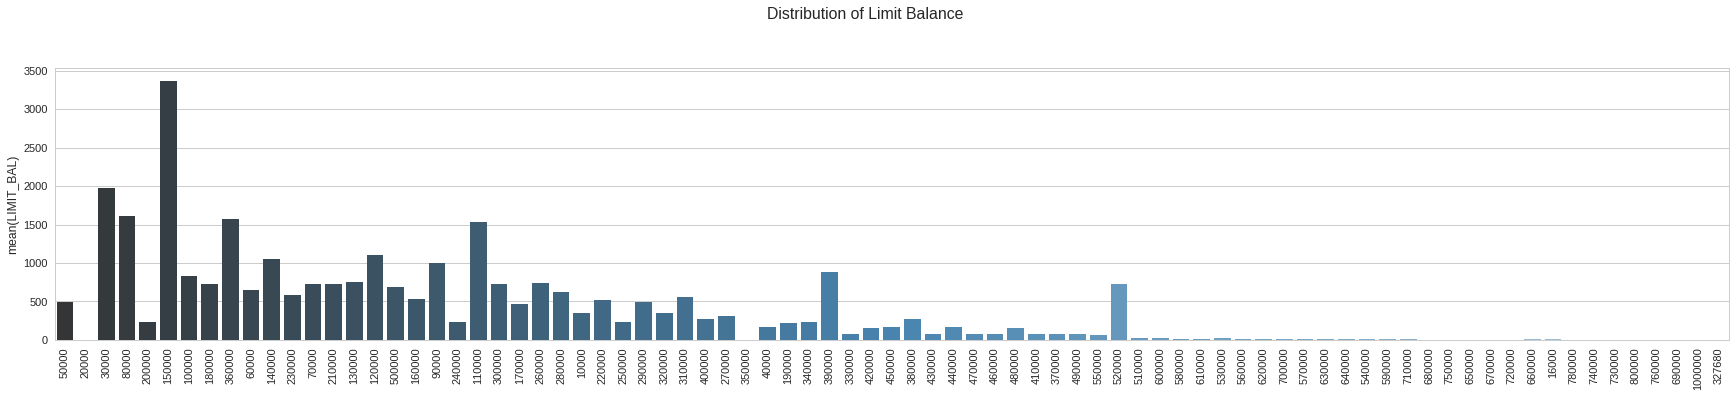

In [10]:
d = df['LIMIT_BAL'].value_counts()

fig = plt.figure()
fig.set_size_inches(30,5)
sns.set_style("whitegrid")

ttl = fig.suptitle('Distribution of Limit Balance')
ttl.set_position([.5, 1.05])

dd = d.index
np.sort(dd)
g = sns.barplot(x = dd, y = d, label='small', palette = 'Blues_d')
g.set_xticklabels(d.index, rotation=90)

## Demographics

In [0]:
df['SEX'] = df['SEX'].astype('category').cat.rename_categories(['M', 'F'])
df['MARRIAGE'] = df['MARRIAGE'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])
df['age_cat'] = pd.cut(df['AGE'], range(0, 100, 10), right=False)

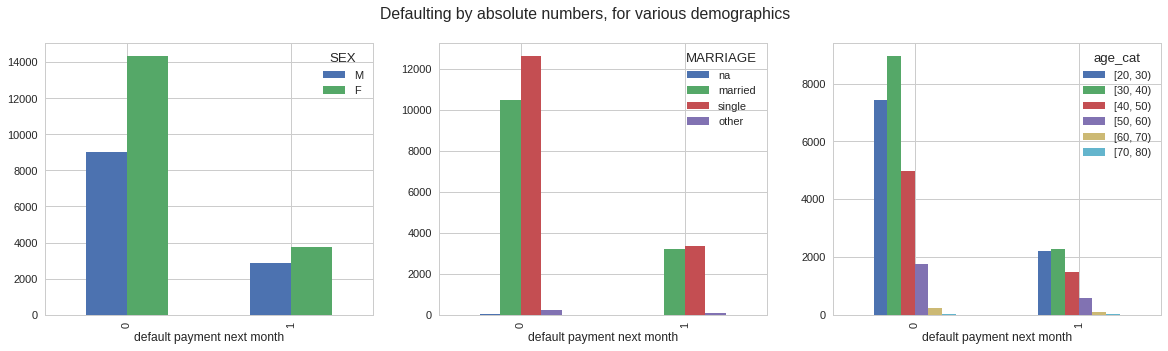

In [12]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

df_demo_1 = df.groupby(['default payment next month', 'SEX']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[0])

df_demo_1 = df.groupby(['default payment next month', 'MARRIAGE']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[1])

df_demo_1 = df.groupby(['default payment next month', 'age_cat']).size()
df_demo_1 = df_demo_1.unstack(level = 1)
df_demo_1.plot(kind = 'bar', ax = ax[2])

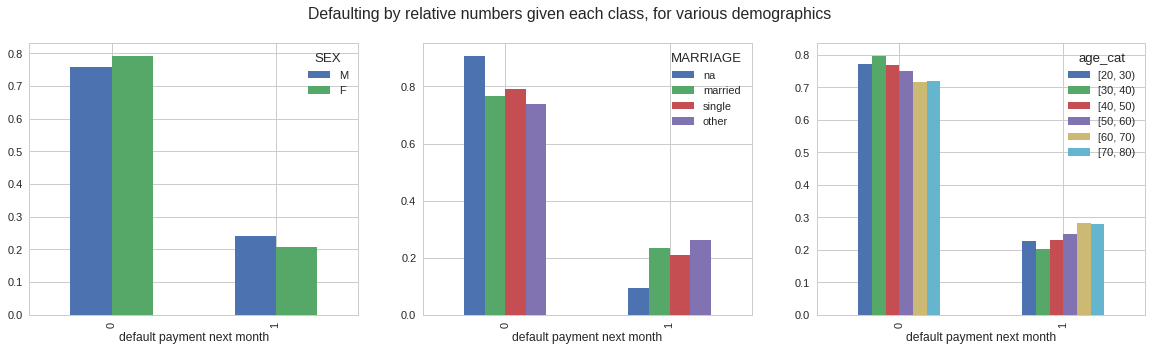

In [13]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by relative numbers given each class, for various demographics')

d = df.groupby(['default payment next month', 'SEX']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[0])

d = df.groupby(['default payment next month', 'MARRIAGE']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[1])

d = df.groupby(['default payment next month', 'age_cat']).size().unstack(level=1)
d = d / d.sum()
p = d.plot(kind='bar', ax=ax[2])

## Segregating Label (Defaulter indicator)

In [0]:
Y = df['default payment next month']
Y = pd.DataFrame(Y)

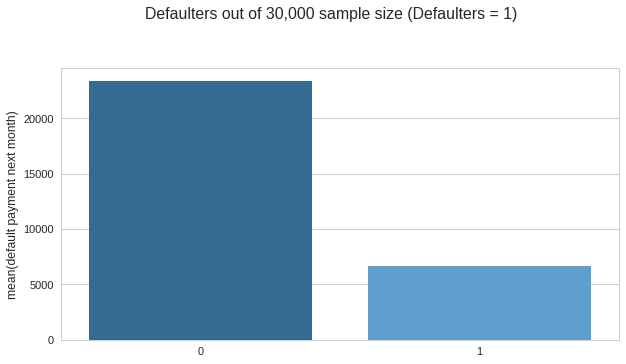

In [15]:
d = Y['default payment next month'].value_counts()

fig1 = plt.figure()
fig1.set_size_inches(10,5)
sns.set_style("whitegrid")

ttl = fig1.suptitle('Defaulters out of 30,000 sample size (Defaulters = 1)')
ttl.set_position([.5, 1.05])

Defaulter_vs_NonDefaulters = d.index
Number_of_Customers = Y['default payment next month'].value_counts()

g1 = sns.barplot(x = Defaulter_vs_NonDefaulters, 
                y = Number_of_Customers, 
                saturation = 1,
                palette = 'Blues_d'
                )

## Post EDA Observations 



1.  Payment  Status explains how much delay every month a user is making. Mostly, **people delay 2 months**. 
2.   Bill Amount explains Bill made over last six months. **For most defaulters, Bill Amount decreases over time**.
3.   Also, **Payment Amount is maximum on second month** for everyone
4.   For Limit Balance, 
5.   **Female** holders are more likely to default.
6.   **Unmarried** holders are more likely to default.
7.   **Age Group [20-30] and [30-40]** are more likely to default.
8.   **28%** of the holders are likely to default **atleast a month**.





# Data Standardization

In [16]:
df.columns

Index([u'ID', u'LIMIT_BAL', u'SEX', u'EDUCATION', u'MARRIAGE', u'AGE',
       u'PAY_0', u'PAY_2', u'PAY_3', u'PAY_4', u'PAY_5', u'PAY_6',
       u'BILL_AMT1', u'BILL_AMT2', u'BILL_AMT3', u'BILL_AMT4', u'BILL_AMT5',
       u'BILL_AMT6', u'PAY_AMT1', u'PAY_AMT2', u'PAY_AMT3', u'PAY_AMT4',
       u'PAY_AMT5', u'PAY_AMT6', u'default payment next month', u'age_cat'],
      dtype='object')

In [0]:
from math import log

df['LIMIT_BAL'] = df['LIMIT_BAL'].apply(lambda x: log(x) if x>0 else 0.0)

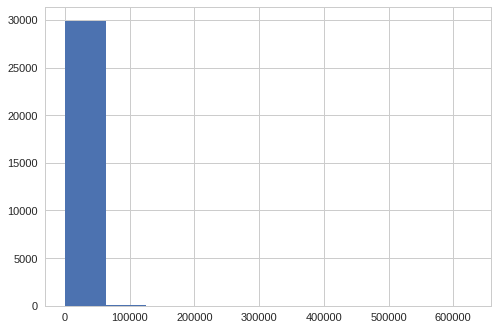

In [18]:
df_pay_amt.mean(axis = 1).hist()

## For Bill Amount Columns

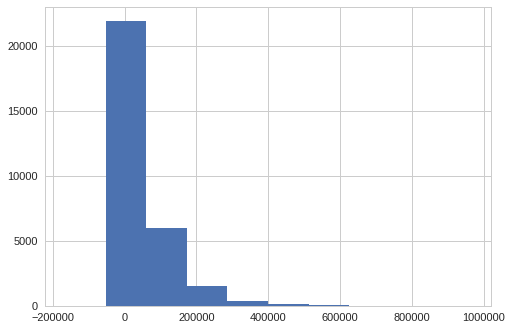

In [19]:
df["BILL_AMT1"].hist()

In [0]:
df['BILL_AMT1'] = df['BILL_AMT1'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['BILL_AMT2'] = df['BILL_AMT2'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['BILL_AMT3'] = df['BILL_AMT3'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['BILL_AMT4'] = df['BILL_AMT4'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['BILL_AMT5'] = df['BILL_AMT5'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['BILL_AMT6'] = df['BILL_AMT6'].apply(lambda x: log(x+1) if x > 0 else 0.0)

## For Payment Amount Columns

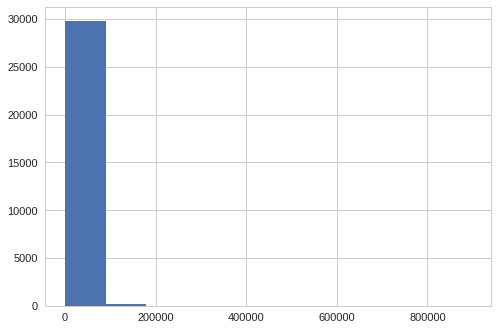

In [21]:
df['PAY_AMT3'].hist()

In [0]:
df['PAY_AMT1'] = df['PAY_AMT1'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['PAY_AMT2'] = df['PAY_AMT2'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['PAY_AMT3'] = df['PAY_AMT3'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['PAY_AMT4'] = df['PAY_AMT4'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['PAY_AMT5'] = df['PAY_AMT5'].apply(lambda x: log(x+1) if x > 0 else 0.0)
df['PAY_AMT6'] = df['PAY_AMT6'].apply(lambda x: log(x+1) if x > 0 else 0.0)

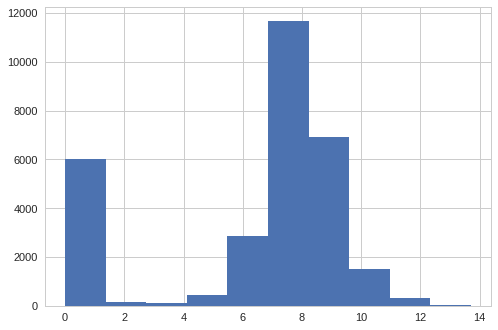

In [23]:
df['PAY_AMT3'].hist()

## For Limit Balance

In [0]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].apply(lambda x: log(x+1) if x>0 else 0.0)

# Feature Engineering

## Dummifying Categorical Columns

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [0]:
df['SEX'] = le.fit_transform(df['SEX'])

df['EDUCATION'] = le.fit_transform(df['EDUCATION'])

df['MARRIAGE'] = le.fit_transform(df['MARRIAGE'])

df['age_cat'] = le.fit_transform(df['age_cat'])


## Bucketize Some of the Continuous Columns into Categorical

### Binning of Bill Amount

In [0]:
temp = df.loc[:, 'BILL_AMT1' : 'BILL_AMT6'].mean(axis = 1)

In [0]:
bins = range(int(temp.min()), int(temp.max()), int(temp.std()))


df['BILL_AMT_CAT'] = pd.qcut(temp, len(bins), labels = False, duplicates = 'drop')

### Binning of Limit Balance

In [0]:
LIM = pd.read_csv("default of credit card clients.csv", usecols=['LIMIT_BAL'])

In [0]:
bins = range(LIM.min(), LIM.max(), LIM.std()/10)


df['LIM_BAL_CAT'] = pd.qcut(LIM, len(bins), labels = False, duplicates = 'drop')

### Binning of Payment Amounts

In [0]:
temp = df_pay_amt.mean(axis = 1)

In [0]:
bins = range(int(temp.min()), int(temp.max()), int(temp.std()))


df['PAY_AMT_CAT'] = pd.qcut(temp, len(bins), labels = False, duplicates = 'drop')

## Relative Payment Amounts and Bill Amounts


In [0]:
df['pay_amt_avg'] = df_pay_amt.mean(axis = 1)

df['pay_rel_amt_1'] = df_pay_amt['PAY_AMT1']/df['pay_amt_avg']
df['pay_rel_amt_2'] = df_pay_amt['PAY_AMT2']/df['pay_amt_avg']
df['pay_rel_amt_3'] = df_pay_amt['PAY_AMT3']/df['pay_amt_avg']
df['pay_rel_amt_4'] = df_pay_amt['PAY_AMT4']/df['pay_amt_avg']
df['pay_rel_amt_5'] = df_pay_amt['PAY_AMT5']/df['pay_amt_avg']
df['pay_rel_amt_6'] = df_pay_amt['PAY_AMT6']/df['pay_amt_avg']

In [0]:
df = df.replace([np.inf, -np.inf], np.nan)

In [0]:
df['pay_rel_amt_1'].fillna(0.0, inplace = True)
df['pay_rel_amt_2'].fillna(0.0, inplace = True)
df['pay_rel_amt_3'].fillna(0.0, inplace = True)
df['pay_rel_amt_4'].fillna(0.0, inplace = True)
df['pay_rel_amt_5'].fillna(0.0, inplace = True)
df['pay_rel_amt_6'].fillna(0.0, inplace = True)

In [36]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
age_cat                       0
BILL_AMT_CAT                  0
LIM_BAL_CAT                   0
PAY_AMT_CAT                   0
pay_amt_avg                   0
pay_rel_amt_1                 0
pay_rel_

In [37]:
df.shape

(30000, 36)

# Checking Multicollinearity and Feature Selection

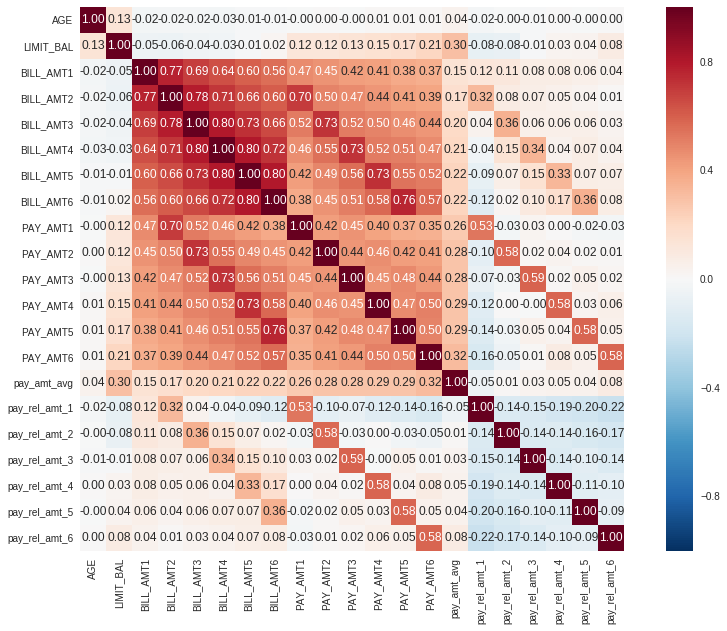

In [38]:
df_numericals = df[['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
'PAY_AMT5','PAY_AMT6', 'pay_amt_avg','pay_rel_amt_1', 'pay_rel_amt_2', 
'pay_rel_amt_3', 'pay_rel_amt_4','pay_rel_amt_5', 'pay_rel_amt_6']]

c = df_numericals.corr()

sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=df_numericals.columns.values, xticklabels=df_numericals.columns.values)


## Removing Multicollinearity using PCA

In [0]:
from sklearn.decomposition import PCA

In [0]:
p = PCA()

In [0]:
df_numericals_decorrelated = p.fit_transform(df_numericals)

In [0]:
df_numericals_decorrelated = pd.DataFrame(df_numericals_decorrelated, columns = df_numericals.columns.values)

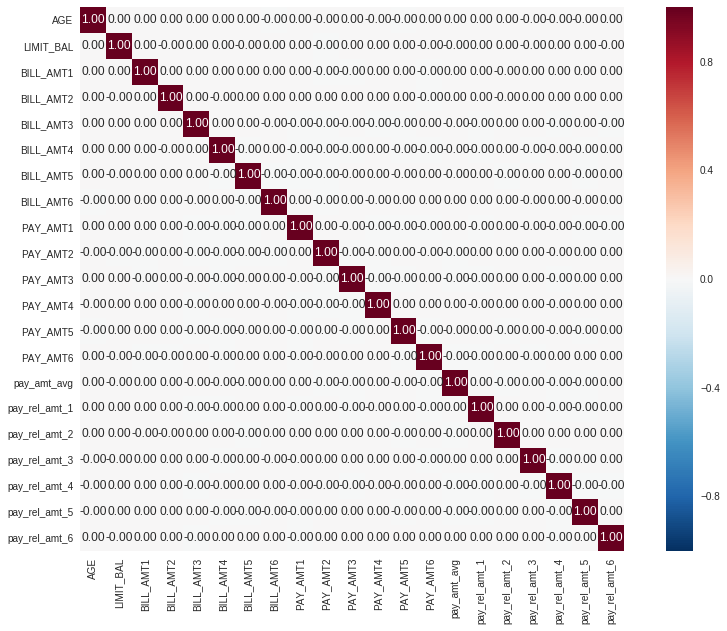

In [43]:
c = df_numericals_decorrelated.corr()

sns.set(font_scale=0.8)
sns.set(rc={'figure.figsize':(15,10)})
heatmap = sns.heatmap(c, cbar=True, annot=True, square=True, fmt='.2f', 
                      yticklabels=df_numericals.columns.values, xticklabels=df_numericals.columns.values)

In [0]:
df_numericals_decorrelated = df_numericals_decorrelated.astype('float')

In [0]:
df_numericals_decorrelated.reset_index(inplace = True)

In [0]:
df_cat = df.drop(['ID', 'AGE', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 
'BILL_AMT6','PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
'PAY_AMT5','PAY_AMT6', 'pay_amt_avg','pay_rel_amt_1', 'pay_rel_amt_2', 
'pay_rel_amt_3', 'pay_rel_amt_4','pay_rel_amt_5', 'pay_rel_amt_6', 'default payment next month'], axis = 1)

In [0]:
df_curated = pd.concat([df_cat, df_numericals_decorrelated], axis = 1)

In [0]:
df_curated.drop(['index'], axis = 1, inplace = True)

In [49]:
Y.head()

,default payment next month
0,1
1,1
2,0
3,0
4,0


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, cohen_kappa_score
from sklearn.cross_validation import train_test_split

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# BaseLine Model : LogisticRegression

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_curated, Y, test_size=0.3, random_state=101)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [54]:
lr.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
predictions = lr.predict(X_test)

In [0]:
cm = confusion_matrix(predictions, y_test)

tp = float(cm[0,0])
fp = float(cm[0,1])
tn = float(cm[1,0])
fn = float(cm[1,1])

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2*tp/(2*tp+fp+fn)


In [57]:
print('Prediction Accuracy : '+ str(round(accuracy_score(predictions, y_test)*100)))
print('Baseline Accuracy : '+ str(round((6636.0/23364.0), 2)))
print('Precision = '+ str(precision))
print('recall = '+ str(recall))
print('F1_Score = '+ str(F1_Score))
print("Cohen's kappa coefficient : "+ str(round(cohen_kappa_score(predictions, y_test)*100)))


Prediction Accuracy : 81.0
Baseline Accuracy : 0.28
Precision = 0.823515210043
recall = 0.934264585045
F1_Score = 0.875401000898
Cohen's kappa coefficient : 28.0


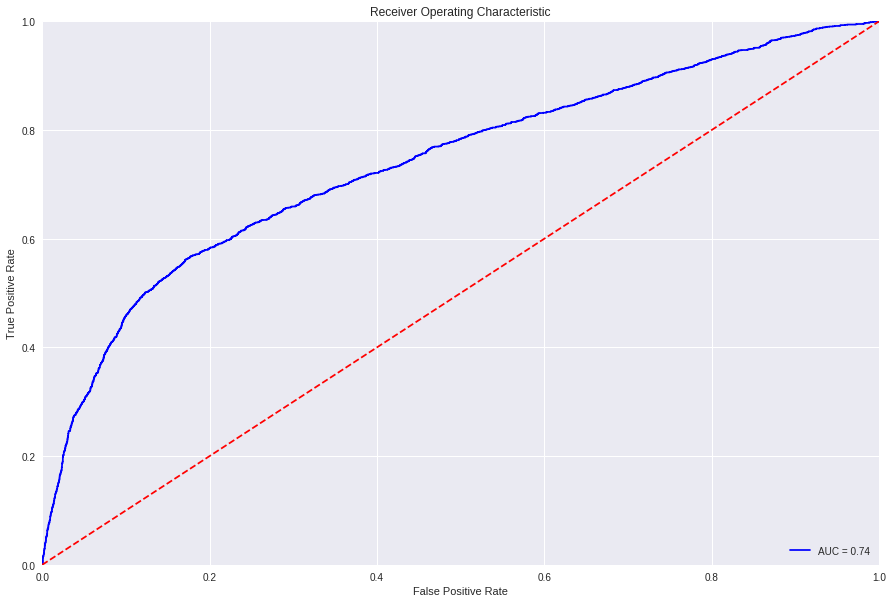

In [58]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training an Ensemble Tree 

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators = 250, min_samples_leaf = 50, oob_score = True)

In [61]:
rf.fit(X_train,y_train)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [62]:
rf.oob_score_

0.817047619047619

In [0]:
predictions = rf.predict(X_test)

## Using Feature Importance of RandomForest 

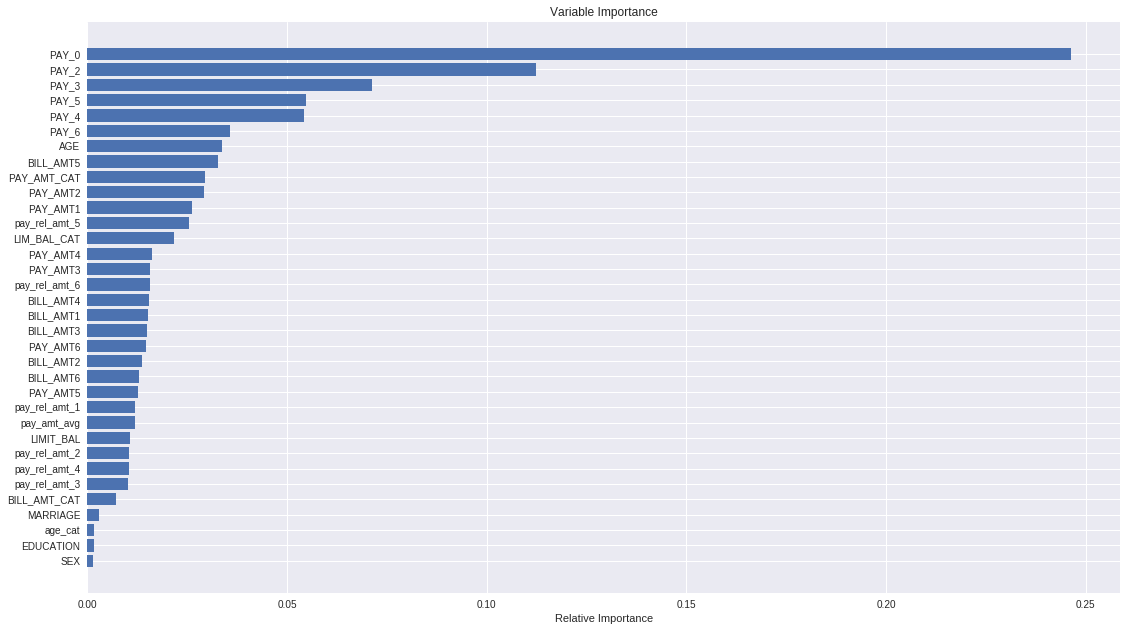

In [64]:
importances = rf.feature_importances_
sorted_idx = np.argsort(importances)
features = df_curated.columns
features = np.array(features)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()

In [0]:
cm = confusion_matrix(predictions, y_test)

tp = float(cm[0,0])
fp = float(cm[0,1])
tn = float(cm[1,0])
fn = float(cm[1,1])

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2*tp/(2*tp+fp+fn)

In [66]:
print('Prediction Accuracy : '+ str(round(accuracy_score(predictions, y_test)*100)))
print('Baseline Accuracy : '+ str(round((6636.0/23364.0), 2)))
print('Precision = '+ str(precision))
print('recall = '+ str(recall))
print('F1_Score = '+ str(F1_Score))
print("Cohen's kappa coefficient : "+ str(round(cohen_kappa_score(predictions, y_test)*100)))

Prediction Accuracy : 82.0
Baseline Accuracy : 0.28
Precision = 0.83813306852
recall = 0.913667117727
F1_Score = 0.874271656092
Cohen's kappa coefficient : 35.0


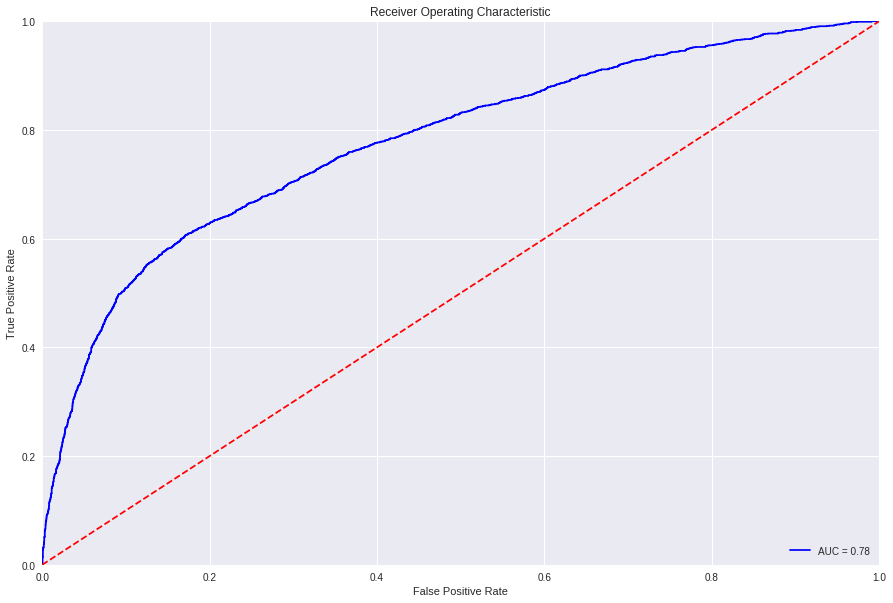

In [67]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training an XgBoost

In [0]:
import xgboost as xgb

In [69]:
xgc = xgb.XGBClassifier(max_depth= 10, n_estimators=100, learning_rate=0.001)
xgc.fit(X_train, y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.001, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [70]:
predictions = xgc.predict(X_test)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
cm = confusion_matrix(predictions, y_test)

tp = float(cm[0,0])
fp = float(cm[0,1])
tn = float(cm[1,0])
fn = float(cm[1,1])

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2*tp/(2*tp+fp+fn)

In [72]:
print('Prediction Accuracy : '+ str(round(accuracy_score(predictions, y_test)*100)))
print('Baseline Accuracy : '+ str(round((6636.0/23364.0), 2)))
print('Precision = '+ str(precision))
print('recall = '+ str(recall))
print('F1_Score = '+ str(F1_Score))
print("Cohen's kappa coefficient : "+ str(round(cohen_kappa_score(predictions, y_test)*100)))

Prediction Accuracy : 81.0
Baseline Accuracy : 0.28
Precision = 0.83904109589
recall = 0.907656421515
F1_Score = 0.872001054574
Cohen's kappa coefficient : 34.0


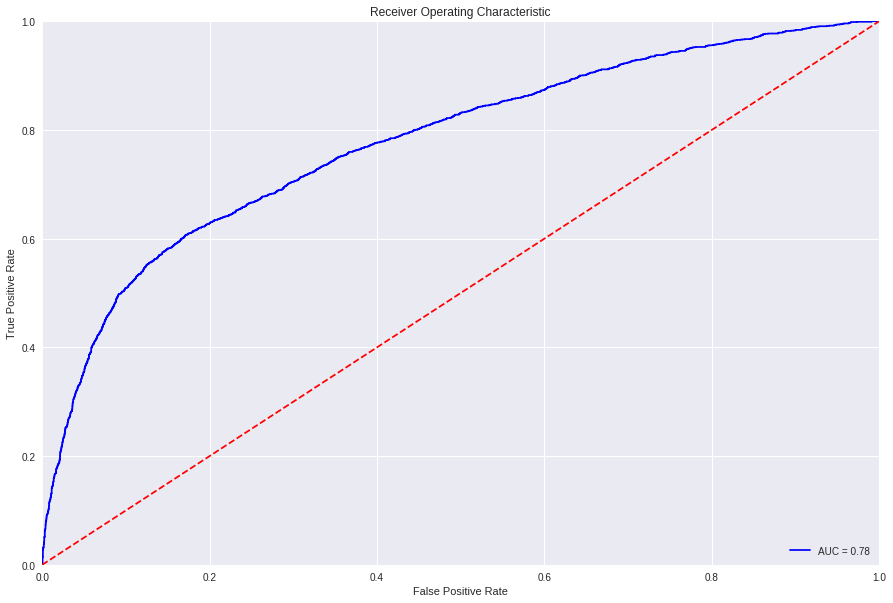

In [73]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Training a Deep Neural Network

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

In [0]:
# create model
model = Sequential()
model.add(Dense(256, input_dim=34, activation='relu'))
model.add(Dense(256, activation='relu'))
#model.add(Dense(512, activation='relu'))
#model.add(Dense(256, activation='relu'))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))


#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

In [0]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=10)

21000/21000 [==============================] - 20s 953us/step - loss: 0.5314 - acc: 0.7765
Epoch 37/150
14190/21000 [===================>..........] - ETA: 6s - loss: 0.5312 - acc: 0.7767

In [78]:
# evaluate the model
scores = model.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

21000/21000 [==============================] - 2s 74us/step

acc: 81.21%


In [0]:
# calculate predictions
predictions = model.predict(X_test)
predictions = [round(x[0]) for x in predictions]

In [0]:
cm = confusion_matrix(predictions, y_test)

tp = float(cm[0,0])
fp = float(cm[0,1])
tn = float(cm[1,0])
fp = float(cm[1,1])

precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1_Score = 2*tp/(2*tp+fp+fn)

In [81]:
print('Prediction Accuracy : '+ str(round(accuracy_score(predictions, y_test)*100)))
print('Baseline Accuracy : '+ str(round((6636.0/23364.0), 2)*100))
print('Precision = '+ str(precision))
print('recall = '+ str(recall))
print('F1_Score = '+ str(F1_Score))
print("Cohen's kappa coefficient : "+ str(round(cohen_kappa_score(predictions, y_test)*100)))

Prediction Accuracy : 81.0
Baseline Accuracy : 28.0
Precision = 0.891093172801
recall = 0.90634567214
F1_Score = 0.89865470852
Cohen's kappa coefficient : 37.0


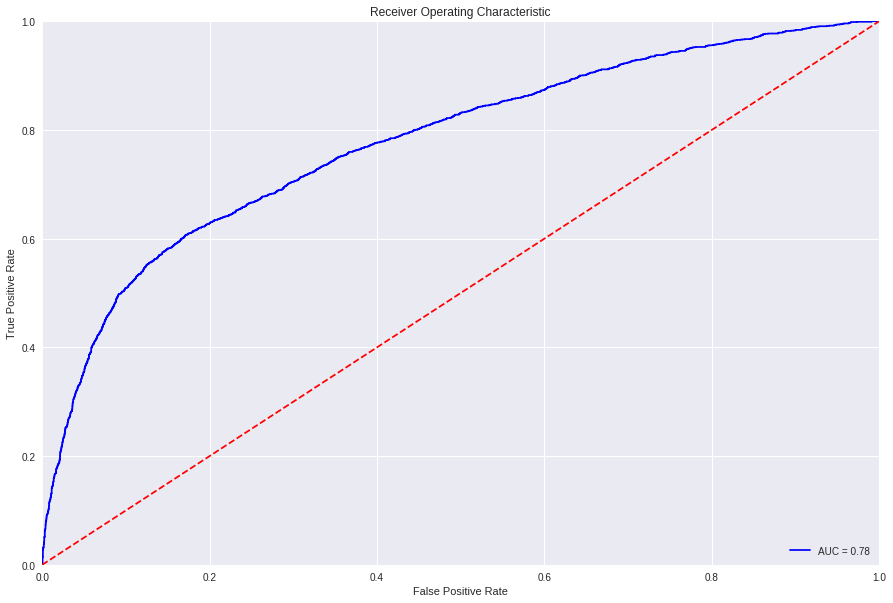

In [82]:
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()